# Capstone project part1

In [1]:
import os
import json
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from cslib import *

#### Loading training data

In [4]:
df = fetch_data('../../CapStone/ai-workflow-capstone-master/cs-train/')

In [5]:
df.head()

,country,customer_id,day,invoice,month,price,stream_id,times_viewed,year,invoice_date
0,United Kingdom,13085.0,28,489434,11,6.95,85048,12,2017,2017-11-28
1,United Kingdom,13085.0,28,489434,11,6.75,79323W,12,2017,2017-11-28
2,United Kingdom,13085.0,28,489434,11,2.10,22041,21,2017,2017-11-28
3,United Kingdom,13085.0,28,489434,11,1.25,21232,5,2017,2017-11-28
4,United Kingdom,13085.0,28,489434,11,1.65,22064,17,2017,2017-11-28


In [6]:
df.describe()

,customer_id,day,month,price,times_viewed,year
count,625249.000000,815011.000000,815011.000000,815011.000000,815011.000000,815011.000000
mean,15333.415068,15.064819,6.592718,4.802631,5.231106,2018.247654
std,1698.360788,8.788845,3.598781,135.058707,5.109982,0.545261
min,12346.000000,1.000000,1.000000,-53594.360000,0.000000,2017.000000
25%,13956.000000,7.000000,3.000000,1.250000,1.000000,2018.000000
50%,15279.000000,15.000000,6.000000,2.100000,3.000000,2018.000000
75%,16813.000000,23.000000,10.000000,4.210000,8.000000,2019.000000
max,18287.000000,31.000000,12.000000,38970.000000,24.000000,2019.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815011 entries, 0 to 815010
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   country       815011 non-null  object        
 1   customer_id   625249 non-null  float64       
 2   day           815011 non-null  int64         
 3   invoice       815011 non-null  object        
 4   month         815011 non-null  int64         
 5   price         815011 non-null  float64       
 6   stream_id     815011 non-null  object        
 7   times_viewed  815011 non-null  int64         
 8   year          815011 non-null  int64         
 9   invoice_date  815011 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 62.2+ MB


#### Converting data into timeseries

In [8]:
df_ts = convert_to_ts(df)

In [9]:
df_ts.head()

,date,purchases,unique_invoices,unique_streams,total_views,year_month,revenue
0,2017-11-01,0,0,0,0,2017-11,0.0
1,2017-11-02,0,0,0,0,2017-11,0.0
2,2017-11-03,0,0,0,0,2017-11,0.0
3,2017-11-04,0,0,0,0,2017-11,0.0
4,2017-11-05,0,0,0,0,2017-11,0.0


## EDA

In [19]:
df_sales = df[['country','price']].groupby('country',as_index=False).sum()

In [23]:
df_sales.head()

,country,price
0,Australia,6872.63
1,Austria,3390.89
2,Bahrain,439.49
3,Belgium,11190.61
4,Bermuda,84.70


[Text(0, 0, 'Australia'),
 Text(0, 0, 'Austria'),
 Text(0, 0, 'Bahrain'),
 Text(0, 0, 'Belgium'),
 Text(0, 0, 'Bermuda'),
 Text(0, 0, 'Brazil'),
 Text(0, 0, 'Canada'),
 Text(0, 0, 'Channel Islands'),
 Text(0, 0, 'Cyprus'),
 Text(0, 0, 'Czech Republic'),
 Text(0, 0, 'Denmark'),
 Text(0, 0, 'EIRE'),
 Text(0, 0, 'European Community'),
 Text(0, 0, 'Finland'),
 Text(0, 0, 'France'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'Greece'),
 Text(0, 0, 'Hong Kong'),
 Text(0, 0, 'Iceland'),
 Text(0, 0, 'Israel'),
 Text(0, 0, 'Italy'),
 Text(0, 0, 'Japan'),
 Text(0, 0, 'Korea'),
 Text(0, 0, 'Lebanon'),
 Text(0, 0, 'Lithuania'),
 Text(0, 0, 'Malta'),
 Text(0, 0, 'Netherlands'),
 Text(0, 0, 'Nigeria'),
 Text(0, 0, 'Norway'),
 Text(0, 0, 'Poland'),
 Text(0, 0, 'Portugal'),
 Text(0, 0, 'RSA'),
 Text(0, 0, 'Saudi Arabia'),
 Text(0, 0, 'Singapore'),
 Text(0, 0, 'Spain'),
 Text(0, 0, 'Sweden'),
 Text(0, 0, 'Switzerland'),
 Text(0, 0, 'Thailand'),
 Text(0, 0, 'USA'),
 Text(0, 0, 'United Arab Emirates'),
 Text(0,

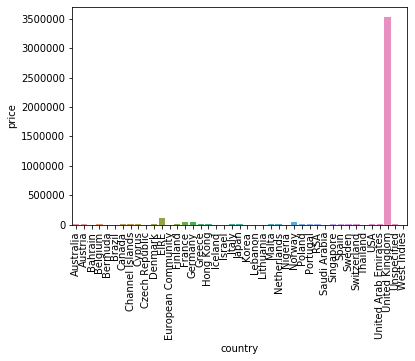

In [34]:
#ax = sns.barplot(x="country", y="price", data=df_sales)
ax = sns.barplot(x="country", y="price", data=df_sales)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
